# Минимизация с ограничениями

In [5]:
import matplotlib
import matplotlib.pyplot as plt

from timeit import timeit

from methods import parse_logs
from step_size import *

In [6]:
matplotlib.use('Agg')
params = {'legend.fontsize': 20,
          'legend.handlelength': 4,
          "axes.labelsize": 45,
          "xtick.labelsize": 25,
          "ytick.labelsize": 25,
          "lines.linewidth": 4,
           "axes.titlesize":30}
matplotlib.rcParams.update(params)
%matplotlib inline

np.random.seed(42)

## 1. Постановка задачи оптимизации с ограничениями.

Общая задача математического программирования

$$
\begin{aligned}
\min_{\mathbf{x} \in Q} \quad & f(\mathbf{x}) \\
\text{s. t.} \quad & g_i(\mathbf{x}) \leq 0, \quad i = 1, \dots, m, \\
& h_j(\mathbf{x}) = 0, \quad j = 1, \dots, p.
\end{aligned}
$$ 

### Определение минимума на множестве
Пусть $x^*$ — точка множества $Q$. Тогда $x^*$ является точкой локального минимума функции $f(x)$ на множестве $Q$, если существует окрестность $U(x^*)$ такая, что для всех $x \in Q \cap U(x^*)$ выполняется неравенство:

$$
f(x^*) \leq f(x).
$$

Подробнее см. Поляк, Б.Т. *Введение в оптимизацию*, стр. 179.

### Гарантии существования минимума на $Q$
Если функция $f(x)$ непрерывна на замкнутом и ограниченном множестве $Q$, то по теореме Вейерштрасса $f(x)$ достигает своего глобального минимума на $Q$.

По сравнению с безусловной минимизацией немного изменяются условия оптимальности, так как минимум может лежать на граничных точках, где $f'(x) \neq 0$.


## 2. Выпуклые множества

### Определение выпуклого множества
$X$ - *выпуклое множество*, если $\forall \alpha \in (0,1]$, $\forall x_1,x_2 \in X$ выполняется $\alpha x_1 + (1 - \alpha) x_2 \in X$

Выпyклое множество - это множество, которое вместе с любыми двyмя точками содержит отрезок эти точки соединяющий.

См. подробнее https://en.wikipedia.org/wiki/Convex_set

### Шар
Шар в $\mathbb{R}^n$ с центром в точке $c$ и радиусом $r$ определяется как множество:
$$
Q = \{x \in \mathbb{R}^n : ||x - c|| \leq r\}
$$

### Выпуклый конус
Выпуклое множество $C$, для которого выполнено 2 условия:

- Если $x \in C$, то для $\theta \geq 0$ имеем $\theta x \in C$
- $\theta_1 x_1 + \theta_2 x_2 \in C$

### Множество симметричных положительно определённых матриц
$$
S^n_{+} = \{ X \in S^n | \langle y,Xy \rangle \geq 0, \forall y \in \mathbb R^n \}
$$

### Параллелепипед
Параллелепипед в $\mathbb{R}^n$ задается неравенствами на координаты:
$$
Q = \{x \in \mathbb{R}^n : a_i \leq x_i \leq b_i, \; i = 1,2,\dots,n\}
$$

### Многогранники (на англ. polyhedra, polyhedron, polytope)

Множество $C$ является многогранником, если для каждого элемента $x \in C$ выполняется:
- $Ax \leq b$ 
- $Bx = c$

При этом множество $X=\{X \ | \ C^T X \leq b\}$ называют полупространством, а $X = \{X \ | \ C^\top X = b \}$ линейным многообразием.

#### Симплекс
Симплекс $\Delta^n$ является множеством всех точек $x \in \mathbb{R}^n$ таких, что:  
$$
x = \sum_{i=0}^{n} \nu_i x_i, \quad \text{где} \quad \nu_i \geq 0 \quad \text{и} \quad \sum_{i=0}^{n} \nu_i = 1
$$  
При этом точки $x_0, x_1, \dots, x_n$ называются вершинами симплекса.

### Выпуклая оболочка
Выпуклая оболочка конечного набора точек $\{ v_1, ..., v_k\}$ есть

$$
\operatorname{conv} \{ v_1, ..., v_k \} = \{ \theta_1 v_1 + ... + \theta_k v_k \ | \ \theta \succeq 0, 1^\top \theta = 1 \}
$$

Симплекс - это выпуклая оболочка точек $x_0, x_1, \dots, x_n$.

## 3. Методы условной минимизации

### Градиентный метод с проекцией
$$x_{k+1} = P_Q(x_k - \alpha_k \nabla f(x_k))$$
, где $\alpha_k$ - длина шага, $P_Q$ - оператор проекции:

![projection_GM_Algorithm.png](projection_GM_Algorithm.png)

Рис.1 Метод проекции градиента

### Оператор проектирования

$$
\begin{aligned}
P_Q(x) := \min_{y\in Q}\ & \| x - y \| \quad \quad \quad \quad (1)
\end{aligned}
$$

### Пример расчета оператора проекции на $\mathbb{R}_{+}^n$

$$
\begin{aligned}
P_{x \in \mathbb{R}^n_+}(y) := \min_{x \geq 0 }\ & \| x - y \|
\end{aligned}
$$

$P_{x \in \mathbb{R}^n_+}(y) = \min \{ y, 0\}$, где $\min$ поэлементная операция.

### Пример расчета оператора проекции для $l_2$-шара

$$
\begin{aligned}
P_{x \in B_2(0, r)}(y) := \min_{x \in B_2(0, r)}\ & \| x - y \|
\end{aligned}
$$

Расчитывается через известную формулу проекции

$$
P_{x \in B_2(0, r)}(y)
=
\begin{cases}
y, & \text{если } \|y\|_2 \le r, \\[6pt]
r \dfrac{\,y}{\|y\|_2}, & \text{если } \|y\|_2 > r.
\end{cases}
$$

### Пример расчета оператора проекции для симплекса

Оператор проекции находится из задачи:
$$
\min_{x \in \mathbb{R}^n} \ \frac{1}{2}\|x - y\|_2^2 
\quad \text{s.t.} \quad 
\sum_{i=1}^n x_i = 1, \quad x_i \ge 0, \; i=1,\dots,n.
$$

Лагранжиан
$$
\mathcal{L}(x, \nu, \lambda) 
= \frac{1}{2}\|x - y\|_2^2 
+ \nu \left( \sum_{i=1}^n x_i - 1 \right)
- \sum_{i=1}^n \lambda_i x_i,
$$
<!-- где $\nu \in \mathbb{R}$ is the multiplier for the equality constraint, and $\lambda_i \ge 0$ correspond to the inequality constraints $x_i \ge 0$. -->

Условия ККТ:
\begin{align}
&\text{(Stationarity)} & \nabla_x \mathcal{L}(x, \nu, \lambda) = 0 
&\quad \Longleftrightarrow \quad x_i - y_i + \nu - \lambda_i = 0, \; i=1,\dots,n. \\
&\text{(Primal feasibility)} & x_i &\ge 0, \quad \sum_{i=1}^n x_i = 1. \\
&\text{(Dual feasibility)} & \lambda_i &\ge 0, \quad i=1,\dots,n. \\
&\text{(Complementary slackness)} & \lambda_i x_i &= 0, \quad i=1,\dots,n.
\end{align}

Из стационарности (1) получаем:
$$
x_i = y_i - \nu + \lambda_i.
$$

Далее рассмотрим два возможных случая
- если $x_i > 0$, то $\lambda_i = 0$, и тогда $x_i = y_i - \nu$ (следует из условия (3) и (4))
- если $x_i = 0$, то $y_i - \nu \le 0$ (следует из (1) и (3)), нам подходит только 0

Таким образом:
$$
x_i = \max\{\, y_i - \nu, \, 0 \,\}.
$$

поэтому исходя из требований на симплекс подбираем $\nu$ так, чтобы $\sum_{i = 1}^n \max\{\, y_i - \nu, \, 0 \,\} = 1$.

Реализуем этот оператор в коде:
1. Сортируем `x` по убыванию: `u = np.sort(x)[::-1]`,
2. Находим самый большой индекс $\rho$ в `u` такой, что $(\sum_{i=0}^\rho u_i - 1) / \rho \geq u_{\rho}$. Таким образом мы находим элементы, которые после вычитания $\nu$ останутся неотрицательными,
3. $\nu = (\sum_{i=0}^\rho u_i - 1) / (\rho + 1)$.

In [ ]:
def rectang_proj(a, b): ## проекция на параллелепипед
    return lambda x: np.clip(x, a, b)

def ball_proj(radius):  ## проекция на шар с центром 0
    def f(x):
        # x /= min(radius, np.linalg.norm(x))
        x /= np.linalg.norm(x)
        x *= radius
        return x
    return lambda x: f(x)

def simplex_proj():
    """Projection onto the unit simplex."""
    
    def f(x):
        if np.sum(x) <=1 and np.alltrue(x >= 0):
            return x
        # Code taken from https://gist.github.com/daien/1272551
        # get the array of cumulative sums of a sorted (decreasing) copy of v
        u = np.sort(x)[::-1]
        cssv = np.cumsum(u)
        # get the number of > 0 components of the optimal solution
        rho = np.nonzero(u * np.arange(1, len(u)+1) > (cssv - 1))[0][-1]
        # compute the Lagrange multiplier associated to the simplex constraint
        theta = (cssv[rho] - 1) / (rho + 1)
        # compute the projection by thresholding v using theta
        return np.maximum(x-theta, 0)
    return f

Реализация метода

In [4]:
class StepSize:
    def __call__(self, x, h, k, *args, **kwargs):
        pass

class ConstantStepSize(StepSize):
    def __init__(self, alpha):
        self.alpha = alpha
    
    def __call__(self, x, h, k, *args, **kwargs):
        return self.alpha

In [5]:
class GradientDescentWithProj:
    def __init__(self, StepSizeChoice, L, projection_f, name=None):
        self.StepSizeChoice = StepSizeChoice
        self.name = name
        self.projection_f = projection_f
        self.L = L
        self.history = []
    
    def solve(self, x0, f, gradf, N):
        self.history = [(x0, time.time())]
        x = x0.copy()
        for k in range(N):
            h = -gradf(x)
            alpha = self.StepSizeChoice(x, h, k, gradf, f)
            x = self.projection_f(x + alpha * h)
            self.history.append((x, time.time()))
            
        return x

### Пример. Квадратичная функция

$$\min_{x \in \mathbb{R}^n} \frac{1}{2}x^\top A x + b^\top x$$
$$\text{s.t. } a_i \leq x_i \leq b_i$$

In [6]:
np.random.seed(2024)

n = 2
A = np.random.randn(n, n)
A *= np.sign(A)
A = A.T @ A
b = np.random.randn(n)
L = max(np.linalg.eigvals(A))
max_iters = 15
mc_fun = lambda x: 1/2 * x.T @ A @ x + b.T @ x
gradf = lambda x: A @ x + b

Решение на параллелепипеде

In [7]:
max_bound = 4
min_bound = -1
method = GradientDescentWithProj(ConstantStepSize(2/L), L, rectang_proj(min_bound, max_bound), name="Rect proj")

X0 = np.zeros(n)
method.solve(X0, mc_fun, gradf, max_iters)

array([ 0.11936054, -1.        ])

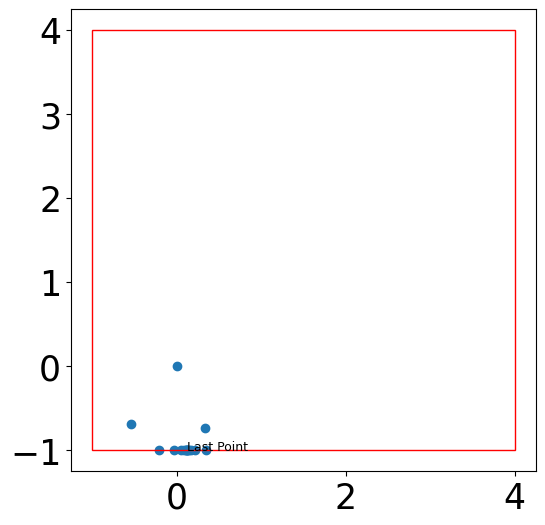

In [8]:
fig, ax = plt.subplots(figsize=(6,6))

_, X = parse_logs(method.history, ret_time=False, funcx=lambda x: x)
X = np.array(X)

ax.scatter(X[:,0], X[:,1], label=method.name)

rect = plt.Rectangle((min_bound, min_bound), (max_bound - min_bound), (max_bound - min_bound), linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

last_point = X[-1]
ax.text(last_point[0], last_point[1], 'Last Point', fontsize=9, ha='left');

Проекция на шаре с центром в 0 и радиусом $r$

In [9]:
radius = 3
proj_f = ball_proj(radius)

method = GradientDescentWithProj(ConstantStepSize(2/L), L, proj_f)
X0 = np.zeros(2)
method.solve(X0, mc_fun, gradf, max_iters)

array([ 0.51145554, -2.95608072])

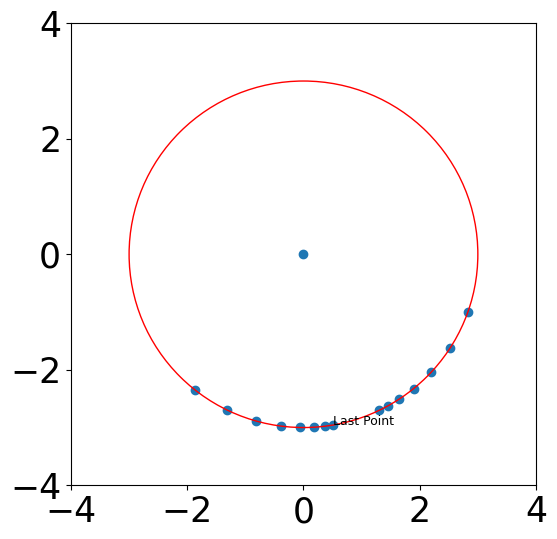

In [10]:
fig, ax = plt.subplots(figsize=(6,6))

_, X = parse_logs(method.history, ret_time=False, funcx=lambda x: x)
X = np.array(X)

ax.scatter(X[:,0], X[:,1], label=method.name)

## Draw circle:
circle = plt.Circle((0, 0), radius, color='r', fill=False)
ax.add_artist(circle)
ax.set_xlim(-radius-1, radius+1)
ax.set_ylim(-radius-1, radius+1)

last_point = X[-1]
ax.text(last_point[0], last_point[1], 'Last Point', fontsize=9, ha='left');

### Условный градиентный метод (метод Франк-Вульфа)
Метод Франка-Вульфа применяется для оптимизации выпуклых функций на выпуклых множествах.

$$x_{k+1} = (1 - \alpha_k) x_k + \alpha_k s_k$$
, где $\alpha_k$ - длина шага, а $s_k$ - решение линейной задачи называемой Linear Minimization Oracle (LMO) (сравните с оператором проекции (1))

$$
\begin{aligned}
\min_{s\in\mathbb{Q}}\ & \nabla f(x)^\top s \quad \quad \quad \quad (2)
\end{aligned}
$$

Некоторые пояснения
- Если известна область, где лежит $x^*$, то можно ограничить её шаром и применить метод ФВ  
- Начальная точка должна лежать внутри допустимой области, так как шаги происходят только внутри допустимой области  
- Доказаны гарантии только для гладких функций, но на практике можно применить и для негладких (субградиент)  
- Работает только для ограничений неравенств. Либо сузить неравенство почти до линии  
- У метода есть новое условие остановки FW-Gap: $\nabla f(x)^\top (s_k - x) \leq \sqrt{\delta}$, где $\delta$ требуемая точность
- При увеличении диаметра алгоритм замедляется

![Frank-Wolfe Algorithm](Frank-Wolfe_Algorithm.png)

Рис. 2. Метод ФВ. Источник: wikipedia

### Линейный минимизационный оракул (LMO)

$$
s_k = \arg \min_{s \in Q} \langle s, \nabla f(x_k) \rangle
$$

### Пример расчета LMO для $l_2$-шара

Задача линейной минимизации (оператор LMO) имеет вид:
$$
s_k = \arg \min_{\| s \|_2 \leq r} \langle s, \nabla f(x_k) \rangle
$$

Из неравенства КБШ: $\nabla f(x_k)^\top s \leq \| \nabla f(x_k) \| \| s \| \leq \| \nabla f(x_k) \| r$, отсюда следует, что
$$
s_k = - \frac{\nabla f(x_k)}{\| \nabla f(x_k) \|_2} r
$$

### Пример расчета LMO для симплекса

Задача линейной минимизации (оператор LMO) имеет вид:
$$
s_k = \arg \min_{s \in \Delta^{n-1}} \langle s, \nabla f(x_k) \rangle
$$

Так как функция $\langle \nabla f(x_k), x \rangle$ линейна, а множество $\Delta^{n-1}$ является выпуклой оболочкой базисных векторов
$e_1, \dots, e_n$ ($e_i$ - вектор у которого 1 в индексе $i$ и 0 в остальных), то минимум достигается в одной из вершин симплекса.  
Следовательно,
$$
s_k = e_{i^*}, \qquad
i^* \in \arg\min_{1 \le i \le n} g_i.
$$

In [11]:
def lmo_l2_ball(radius, center=None):
    """
    The Frank-Wolfe lmo function for the l2 ball and
    x \in ||radius - center||_2 <= radius
    """

    def f(g):
        if center is None:
            center_p = np.zeros(g.shape[0])
        else:
            center_p = np.array(center)
        s = center_p - radius * g/np.linalg.norm(g)
        # s[s == 0] = 1e-20 # zeros may be dangerous

        assert abs(np.linalg.norm(s - center_p) - radius) <= 1e-9 # check for correctness

        return s

    return lambda g: f(g)


def lmo_linf_ball(radius, center=None):
    """
    The Frank-Wolfe lmo function for the l_\infty ball on x > 0 and
    x \in ||radius - center||_\infty <= radius
    """
    assert center is None, "center are not implemented yet"

    def f(g):
        return np.ones(g.shape[0]) * radius * (-1) * np.sign(g)

    return lambda g: f(g)


def lmo_simplex(radius=1):
    """
    The Frank-Wolfe lmo function for the nuclear ball and
    x \in ||radius - center||_2 <= radius
    """

    def f(g):
        s = np.zeros_like(g)
        # s += 1e-20 # zeros may be dangerous
        s[np.argmin(g)] = radius  # for example see LMO for simplex e.g.: https://arxiv.org/abs/2106.10261v1 page 9

        return s

    return lambda g: f(g)
    

def lmo_one_norm(radius=1):
    pass

<>:2: SyntaxWarning: invalid escape sequence '\i'
<>:23: SyntaxWarning: invalid escape sequence '\i'
<>:36: SyntaxWarning: invalid escape sequence '\i'
<>:2: SyntaxWarning: invalid escape sequence '\i'
<>:23: SyntaxWarning: invalid escape sequence '\i'
<>:36: SyntaxWarning: invalid escape sequence '\i'
C:\Users\alexa\AppData\Local\Temp\ipykernel_8028\2844626896.py:2: SyntaxWarning: invalid escape sequence '\i'
  """
C:\Users\alexa\AppData\Local\Temp\ipykernel_8028\2844626896.py:23: SyntaxWarning: invalid escape sequence '\i'
  """
C:\Users\alexa\AppData\Local\Temp\ipykernel_8028\2844626896.py:36: SyntaxWarning: invalid escape sequence '\i'
  """


Реализуем метод Франк-Вульфа

In [12]:
def FW_alg(f, gradf, lmo, L, x0, max_iters=100, is_descent_step=False, 
           epsilon=1e-12):
    x = x0.copy()
    history = [(x0, time.time())]
    for k in range(max_iters):
        g = gradf(x)
        s = lmo(g)
        if is_descent_step:
            alpha = 2/(k+2)
        else:
            alpha = min(-g.dot(s - x) / (L * np.linalg.norm(s - x)**2), 1)
        assert 0 <= alpha <= 1, f"alpha = {alpha}"
        x = x + alpha * (s - x)
        if np.linalg.norm(x - history[-1][0]) < epsilon and not k == 0:
            print("Function value did not decrease significantly.")
            break
        history.append((x, time.time()))
    return x, history

In [4]:
class SmoothFunction:
    """
    Smooth Function, can query f(x) and gradient
    """

    def __call__(self, x):
        assert 0, "SmoothFunction: __call__(x) is not defined"

    def gradient(self, x):
        assert 0, "SmoothFunction: gradient(x) is not defined"

    def func_grad(self, x, flag):
        """
        flag=0: function, flag=1: gradient, flag=2: function & gradient
        """
        assert 0, "SmoothFunction: func_grad(x, flag) is not defined"

#### Способы выбора длины шага в методе Франк-Вульфа

1. Убывающий шаг.

    Длина шага выбирается заранее и остаётся постоянной на всех итерациях:
    $$ \alpha_t = \frac{2}{t+2} $$

    Оптимальная скорость сходимости для такого шага - сублинейная $O(1/k)$.

2. Шаг через минимизацию квадратичной аппроксимации (shortest step).

    Если функция $f(\mathbf{x})$ липшицева, то длина шага может быть найдена через квадратичную аппроксимацию:
    $$\alpha_t = \frac{\nabla f(\mathbf{x}_t)^\top (\mathbf{x}_t - \mathbf{s}_t)}{L \|\mathbf{x}_t - \mathbf{s}_t\|^2}$$

    Здесь $L$ — константа Липшица градиента функции $f(\mathbf{x})$, $s_t$ решение задачи линейной минимизации (LMO).

Так же возможно применять методы, которые применялись в обычном градиентном методе типа шага Армихо, Вульфа и т.д.

### Пример. Сравнение сходимости убывающего и наикротчайшего шага для алгоритма FW

Рассмотрим задачу:
$$
\begin{equation}
\begin{aligned}
\min_{x \in \mathbb{R}^n} \quad & \|Ax - b\|_2^2 \\
\text{s.t.} \quad & \|x\|_2 \leq r
\end{aligned}
\end{equation}
$$

In [14]:
def f_np(x, A, b):
    res = A @ x - b
    return res @ res

def gradf_np(x, A, b):
    return 2 * A.T @ (A @ x - b)

На $\ell_2$-шаре

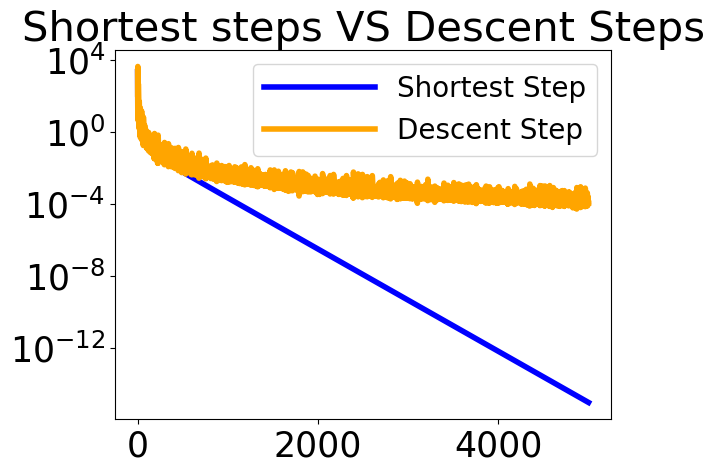

In [15]:
np.random.seed(33)
m=15
n=30
ball_radius = 5
A = np.random.rand(m, n)
omega_sol = np.random.rand(n)
omega_sol = omega_sol / np.linalg.norm(omega_sol) * ball_radius
b = A @ omega_sol + 0.1 * np.random.randn(m)

mc_fun = lambda x: f_np(x, A, b)
gradf_quad_ready = lambda x: gradf_np(x, A, b)
L = np.linalg.norm(2 * A.dot(A.T), ord=2)
max_iters=5000
X0=np.zeros(n)

x_shortest, history = FW_alg(mc_fun, gradf_quad_ready, lmo_l2_ball(ball_radius), L, X0, max_iters)
history_shortest = [mc_fun(h[0]) for h in history]
x_desc, history = FW_alg(mc_fun, gradf_quad_ready, lmo_l2_ball(ball_radius), L, X0, max_iters, is_descent_step=True)
history_descent = [mc_fun(h[0]) for h in history]

fig, ax = plt.subplots()
ax.plot(history_shortest, label='Shortest Step', color='blue')
ax.plot(history_descent, label='Descent Step', color='orange')
ax.set_yscale('log')

ax.set_title('Shortest steps VS Descent Steps')
ax.legend()
plt.show()

На симплексе

Генерируем решение на грани симплекса

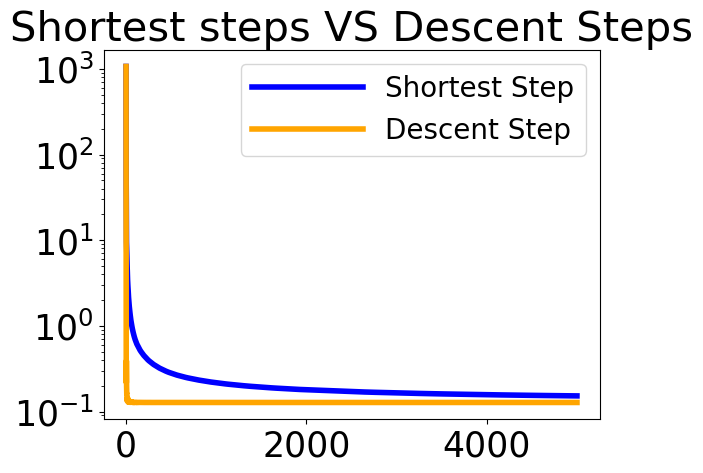

In [16]:
np.random.seed(21)
m=15
n=30
A = np.random.rand(m, n)
omega_sol = np.zeros(n)
omega_sol[0] = 0.5
omega_sol[3] = 0.5
b = A @ omega_sol + 0.1 * np.random.randn(m)

mc_fun = lambda x: f_np(x, A, b)
gradf_quad_ready = lambda x: gradf_np(x, A, b)
L = np.linalg.norm(2 * A.dot(A.T), ord=2)
max_iters=5000
X0=np.random.rand(n)

x_shortest, history = FW_alg(mc_fun, gradf_quad_ready, lmo_simplex(), L, X0, max_iters)
history_shortest = [mc_fun(h[0]) for h in history]
x_desc, history = FW_alg(mc_fun, gradf_quad_ready, lmo_simplex(), L, X0, max_iters, is_descent_step=True)
history_descent = [mc_fun(h[0]) for h in history]

fig, ax = plt.subplots()
ax.plot(history_shortest, label='Shortest Step', color='blue')
ax.plot(history_descent, label='Descent Step', color='orange')
ax.set_yscale('log')

ax.set_title('Shortest steps VS Descent Steps')
ax.legend()
plt.show()

### Пример. Максимизация охвата точек на плоскости при минимальной площади круга

Задачу можно сформулировать так (опустили $\pi$) (контрольный вопрос: пчму не стали решать исходную задачу методом Франк-Вульфа?): 
$$
\begin{aligned}
\boldsymbol{c}_*, r_*=\underset{\boldsymbol{c}, r}{\operatorname{argmin}} \ & r^2 \\
\text { s.t. } & \left\|\boldsymbol{x}_1-\boldsymbol{c}\right\|^2-r^2 \leq 0 \\
& \left\|\boldsymbol{x}_2-\boldsymbol{c}\right\|^2-r^2 \leq 0 \\
& \vdots \\
& \left\|\boldsymbol{x}_n-\boldsymbol{c}\right\|^2-r^2 \leq 0
\end{aligned}
$$

Задача может быть заменена двойственной:
$$
\begin{array}{rlrl}
\boldsymbol{\mu}_*=\underset{\boldsymbol{\mu}}{\operatorname{argmin}} & \boldsymbol{\mu}^{\top} \boldsymbol{X}^{\top} \boldsymbol{X} \boldsymbol{\mu}-\boldsymbol{z}^{\top} \boldsymbol{\mu} \\
& \boldsymbol{1}^{\top} \boldsymbol{\mu} & =1 \\
\text { s.t. } & \boldsymbol{\mu} & \succeq \mathbf{0}
\end{array}
$$  
, где $z \in \mathbb{R}^n$ вектор с элементами $z_j = x_j ^\top x_j$.

Затем получить решение исходной задачи  
$r_*=\sqrt{\boldsymbol{z}^{\top} \boldsymbol{\mu}_*-\boldsymbol{\mu}_*^{\top} \boldsymbol{X}^{\top} \boldsymbol{X} \boldsymbol{\mu}_*}$  
$c^*=X \mu$    


Подробнее см. https://en.wikipedia.org/wiki/Smallest-circle_problem

In [17]:
class EnclosingBallDualFun(SmoothFunction):
    def __init__(self, A):
        self.A = A
        self.b = np.array([np.dot(A[:, i], A[:, i]) for i in range(A.shape[1])])
        self.c = 0
        self.r = 0

    def f(self, x):
        return self.func_grad(x, flag=0)

    def lagrange_to_meb(self, x):
        assert x.sum() - 1 <= 1e-9
        self.radius = (self.b.T.dot(x) - x.T.dot(self.A.T.dot(self.A)).dot(x))**0.5
        self.center = self.A.dot(x)

    def func_grad(self, x, flag=2):
        if flag == 0:
            fx = x.T.dot(self.A.T.dot(self.A)).dot(x) - self.b.T.dot(x)
            self.lagrange_to_meb(x)
            return fx

        g = 2*self.A.T.dot(self.A).dot(x) - self.b
        if flag == 1:
            return g

        fx = x.T.dot(self.A.T.dot(self.A)).dot(x) - self.b.T.dot(x)
        self.lagrange_to_meb(x)
        return fx, g

    def gradient(self, x):
        return self.func_grad(x, flag=1)

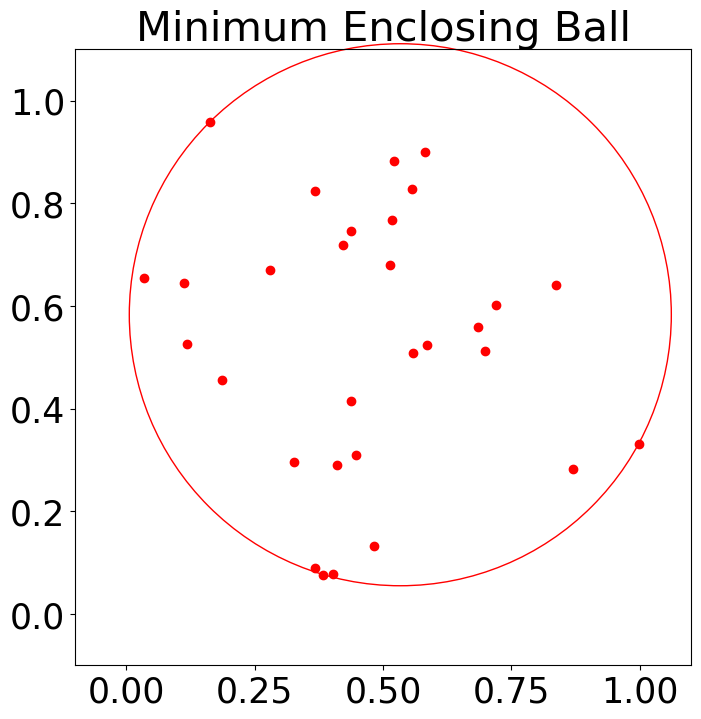

In [18]:
np.random.seed(25)
n=2
m=30
A = np.random.rand(n, m)
mc_fun = EnclosingBallDualFun(A)
L = 1
max_iters=5000
X0=np.ones(m)/m

X, history = FW_alg(mc_fun.f, mc_fun.gradient, lmo_simplex(), L, X0, max_iters)
mc_fun.f(X)

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(A[0, :], A[1, :], color='red', label='Points')
circle = plt.Circle(mc_fun.center, mc_fun.radius, color='r', clip_on=False, fill=False)
ax.add_patch(circle);
ax.set_xlim([-0.1, 1.1])
ax.set_ylim([-0.1, 1.1])
ax.set_aspect('equal', adjustable='box')
ax.set_title('Minimum Enclosing Ball')
plt.show()

## Оператор проекции VS линейный минимизационный оракул

Сравним скорости сходимости и вычислительную сложность алгоритма Франк-Вульфа и алгоритма с проекции градиента.

### Пример. Matrix completion problem

Эта задача часто встречается в машинном обучении. Например, при работе с пропущенными признаками в задачах классификации или регрессии, или же в коллаборативной фильтрации (классический пример — задача от Netflix).

$$
\min _{Z \in \mathbb{R}^{m \times n}} \ f(Z):=\frac{1}{2} \sum_{(i, j) \in \Omega}\left(Z_{i j}-X_{i j}\right)^2 \\
$$

$$
\text { s.t. } \  \text{rank}X \leq \delta
$$
, где $(i, j) \in \Omega$.

Функция ограничения не является выпуклой. Но её можно аппроксимировать выпуклой:

$$
\text { s.t. } \ \| X \|_{*} \leq \delta
$$

, где функция ограничения является шаром ядерной нормы (nuclear norm ball) $\| X \|_{*} = \sum _{i=1}^{\text{rank}(X)}\sigma _{i}(X)$ и $\sigma _{i}$ - сингулярное значение матрицы $X$, который является выпуклой оболочкой функции $\text{rank}(X)$ (Fazel ’02):  
$$
\begin{aligned}
C & =\left\{\mathrm{Z} \in \mathbb{R}^{n_1 \times n_2}:\|\mathrm{Z}\|_* \leq \delta\right\} \\
& =\operatorname{conv}\left\{\delta \mathrm{uv}^{\top}: \mathrm{u} \in \mathbb{R}^{n_1}, \mathrm{v} \in \mathbb{R}^{n_2},\|\mathrm{u}\|=\|\mathrm{v}\|=1\right\}
\end{aligned}
$$

In [20]:
class MatrixCompletionFun(SmoothFunction):
    def __init__(self, known_X, known_value_indices, delta=1):
        self.known_X = known_X
        self.known_value_indices = known_value_indices
        self.delta = delta

    def __call__(self, x):
        return self.f(x)

    def f(self, x):
        return self.func_grad(x, flag=0)

    def func_grad(self, x, flag=2):
        if flag == 0:
            fx = 0.5 * np.linalg.norm(self.known_X - np.multiply(x, self.known_value_indices), 'fro') ** 2
            return fx

        g = (x - self.known_X) * self.known_value_indices
        if flag == 1:
            return g

        fx = 0.5 * np.linalg.norm(self.known_X - np.multiply(x, self.known_value_indices), 'fro') ** 2
        return fx, g

    def gradient(self, x):
        return self.func_grad(x, flag=1)

In [44]:
maxItrs = 150

n, k = 1000, 10
U = np.random.normal(0, 1, (n, k))
U = np.linalg.qr(U)[0]
S = np.diag(np.random.uniform(0, 1, k))
S /= np.sum(S)
A = U.dot(S.dot(U.T))
O = np.random.randint(0,2, (n, n))
Y = np.multiply(A, O)

X0 = np.random.normal(0, 1, (n, n))

mc_fun = MatrixCompletionFun(Y, O)

#### LMO для шара ядерной нормы

Задача LMO для данного множества:

$$
s_k = \arg \min_{\| s \|_* \leq \delta} \langle s, \nabla f(x_k) \rangle
$$

Решение (см. https://arxiv.org/pdf/1511.02204): $s_k = \delta u_1 v_1^\top$, где $u_1, v_1$ векторы соответствующие максимальному сингулярному значению матрицы $\nabla f(x_k)$.

Примечание. $u_1$ и $v_1$ находятся за фиксированное количество итераций.

#### Оператор проекции для шара ядерной нормы

Оператор проекции выглядит следующим образом

$$
\begin{aligned}
P_{\| X \|_* \leq \delta}(Y) := \min_{\| X \|_* \leq \delta}\ & \| X - Y \|_F^2
\end{aligned}
$$
, где $\| . \|_F$ в смысле нормы Фробениуса.

Из Von Neumann's trace inequality ([wiki](https://en.wikipedia.org/wiki/Trace_inequality#Von_Neumann's_trace_inequality_and_related_results)) следует, что у оптимального решения задачи выше сингулярные векторы совпадают, поэтому разложим матрицы в SVD:
$$
\| U \text{diag}(\sigma) V^\top - U \text{diag}(\sigma^*) V^\top \|_F
$$
В этой функции мы регулируем только сингулярные значения $\sigma$, поэтому задачу можно переписать так:
$$
\begin{aligned}
\min_{\sigma^*}\ & \| \sigma^* - \sigma \|_2 \\
\text{s.t. } & \sum_{i=0}^n \sigma^*_i \leq \delta,\quad \sigma^* \ge 0
\end{aligned}
$$

Последняя задача это оператор проекции на симплекс радиуса $\delta$, который уже был получен.

In [19]:
def nuclear_projection():
    """Projection onto nuclear norm ball."""
    simpex_proj = simplex_proj()

    def f(X):
        U, s, V = np.linalg.svd(X, full_matrices=False)
        s = simpex_proj(s)
        return U.dot(np.diag(s).dot(V))
    return f

### Градиентный метод с проекцией

In [ ]:
nuclear_proj_op = nuclear_projection()

class SeqStepSize(StepSize):
    def __init__(self, d=1, alpha0=2, alpha_function=None):
        if alpha_function is not None:
            self.alpha_function = alpha_function
        else:
            self.alpha_function = lambda k: alpha0/(k+2)**d
    
    def __call__(self, x, h, k, *args, **kwargs):
        return self.alpha_function(k)
    
gd_proj = GradientDescentWithProj(SeqStepSize(), None, nuclear_proj_op, name="Nuclear ball proj")

In [41]:
X = gd_proj.solve(X0, mc_fun.f, mc_fun.gradient, maxItrs)

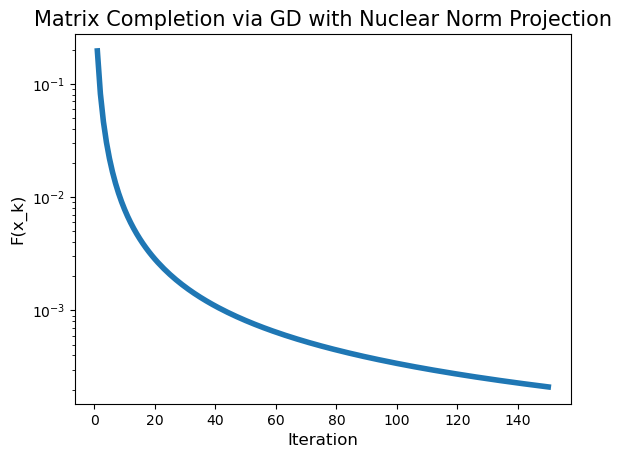

In [42]:
times, Fs = parse_logs(gd_proj.history, ret_time=False, funcx=lambda x: mc_fun(x))

fig, ax = plt.subplots()

ax.plot(times[1:], Fs[1:])
ax.set_yscale('log')
ax.set_title('Matrix Completion via GD with Nuclear Norm Projection', fontsize=15)
ax.set_xlabel('Iteration', fontsize=12)
ax.set_ylabel('F(x_k)', fontsize=12)
ax.set_yscale('log')
ax.tick_params(axis='both', labelsize=10)
plt.show()

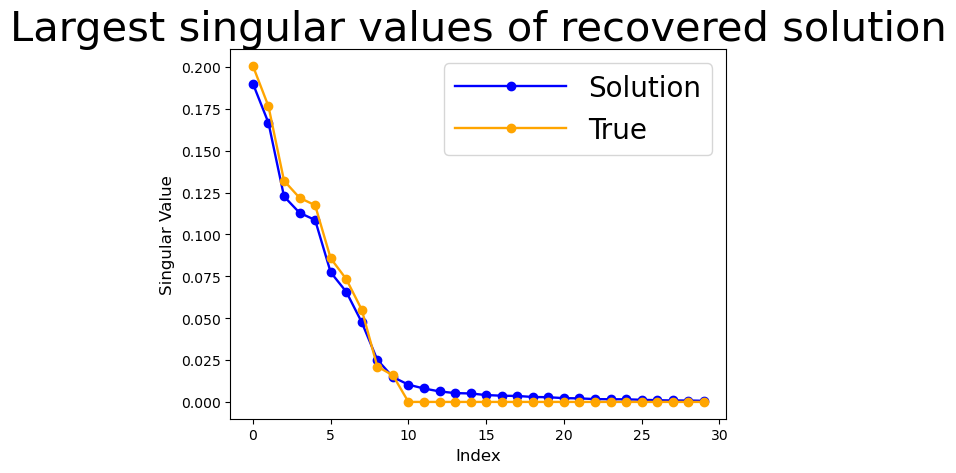

In [43]:
U, S, V = np.linalg.svd(X, full_matrices=False)
Ur, Sr, Vr = np.linalg.svd(A, full_matrices=False)

fig, ax = plt.subplots()

plt.title('Largest singular values of recovered solution')
ax.plot(np.sort(S)[::-1][:30], 'o-', label='Solution', color='blue', linewidth=1.7)
ax.plot(np.sort(Sr)[::-1][:30], 'o-', label='True', color='orange', linewidth=1.7)
ax.set_xlabel('Index', fontsize=12)
ax.set_ylabel('Singular Value', fontsize=12)
ax.tick_params(labelsize=10)
ax.legend()

### Метод Франк-Вульфа

In [ ]:
def lmo_nuclear_norm_ball():
    def power_method(A, num_steps=10):
        m, n = A.shape
        x = np.random.normal(0, 1, m)
        x /= np.linalg.norm(x)
        y = A.T.dot(x)
        y /= np.linalg.norm(y)
        for _ in range(num_steps):
            x = A.dot(y)
            x /= np.linalg.norm(x)
            y = A.T.dot(x)
            y /= np.linalg.norm(y)
        return x, y

    def f(G):
        """Linear optimization oracle for matrix completion."""
        x, y = power_method(-G)
        return x.reshape((len(x), 1)).dot(y.reshape((1,len(y))))

    return lambda G: f(G)

In [26]:
X, history = FW_alg(mc_fun.f, mc_fun.gradient, lmo_nuclear_norm_ball(), 
                    None, X0, maxItrs, is_descent_step=True, epsilon=1e-9)

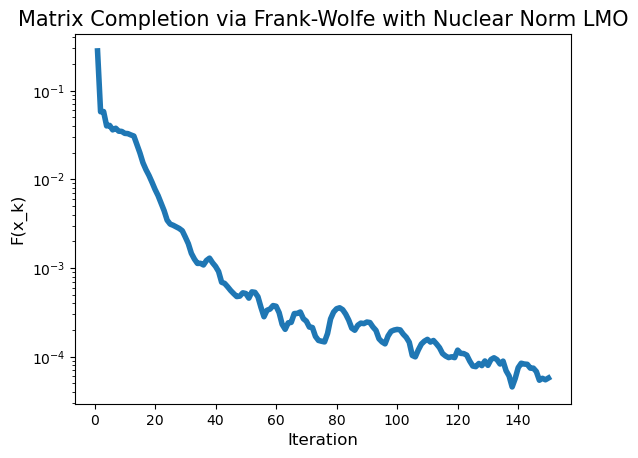

In [27]:
times, Fs = parse_logs(history, ret_time=False, funcx=lambda x: mc_fun(x))

fig, ax = plt.subplots()

ax.plot(times[1:], Fs[1:])
ax.set_title('Matrix Completion via Frank-Wolfe with Nuclear Norm LMO', fontsize=15)
ax.set_xlabel('Iteration', fontsize=12)
ax.set_ylabel('F(x_k)', fontsize=12)
ax.set_yscale('log')
ax.tick_params(axis='both', labelsize=10)
plt.show()

Сравним сингулярные значения с реальными. Для этого посмотрим на 30 самых больших сингулярных значений в итоговой матрице

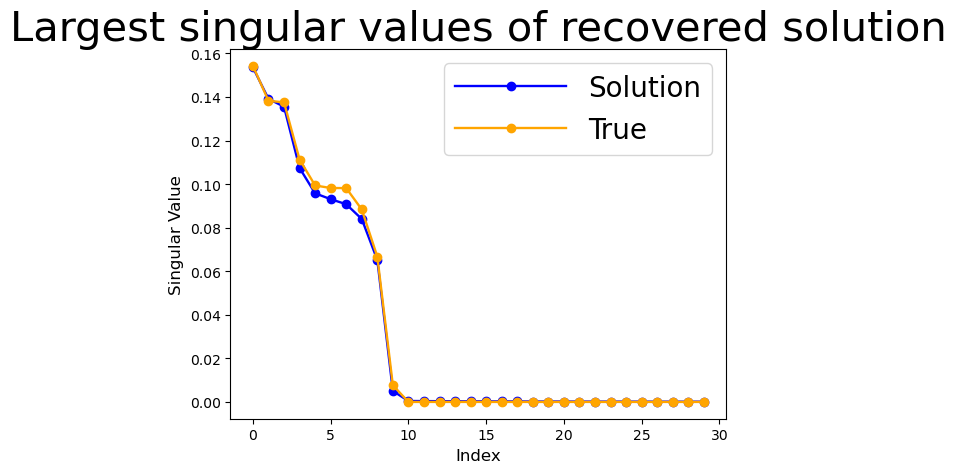

In [28]:
U, S, V = np.linalg.svd(X, full_matrices=False)
Ur, Sr, Vr = np.linalg.svd(A, full_matrices=False)

fig, ax = plt.subplots()

plt.title('Largest singular values of recovered solution')
ax.plot(np.sort(S)[::-1][:30], 'o-', label='Solution', color='blue', linewidth=1.7)
ax.plot(np.sort(Sr)[::-1][:30], 'o-', label='True', color='orange', linewidth=1.7)
ax.set_xlabel('Index', fontsize=12)
ax.set_ylabel('Singular Value', fontsize=12)
ax.tick_params(labelsize=10)
ax.legend()

### Сравнение вычислительной сложности оператора проекции и LMO

In [29]:
lmo_nuclear_ball = lmo_nuclear_norm_ball()
nuclear_proj = nuclear_projection()

ts1 = []
ts2 = []
ns = [1000, 2000, 3000, 4000]
for n in ns:
    f = lambda: lmo_nuclear_ball(np.random.normal(0,1,(n, n)))
    ts1.append(timeit(f, number=1))
    f = lambda: nuclear_proj(np.random.normal(0,1,(n, n)))
    ts2.append(timeit(f, number=1))

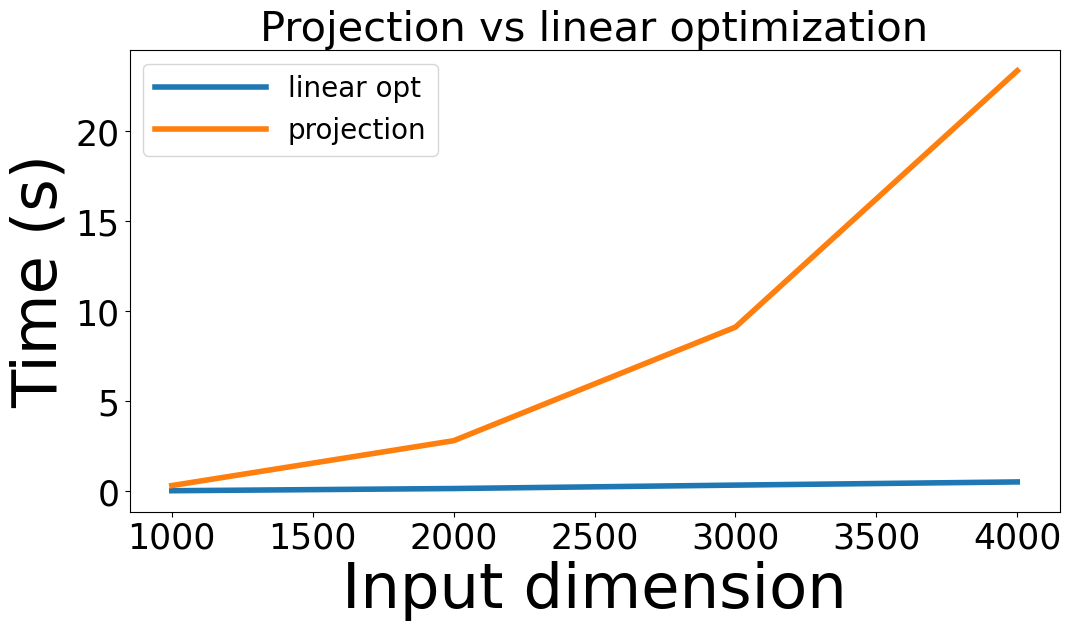

In [30]:
plt.figure(figsize=(12,6))
plt.xlabel('Input dimension')
plt.ylabel('Time (s)')
plt.title('Projection vs linear optimization')
plt.plot(ns, ts1, label='linear opt')
plt.plot(ns, ts2, label='projection')
plt.legend()

## 3.3 Метод штрафных функций
Штрафные функции используются для преобразования задачи условной оптимизации в задачу безусловной оптимизации.

Алгоритм:
1. Определяем штрафную функцию $r(x)$.
2. Оптимизируем функцию вида:
   $$\min_x \left(f(x) + \frac{1}{\mu} r(x)\right)$$
   где $\mu$ - параметр штрафа.
3. На каждом шаге снижаем значение $\mu$, постепенно приближаем $x$ к допустимому множеству.

__Примечание__ При $\mu \to 0$ задача становится труднорешаемой из-за доминирования второго слагаемого   
См. подробнее в главе про структурную оптимизацию в Ю. Е. Нестеров "Методы выпуклой оптимизации" с. 209    

Не забудьте следить, чтобы решение было достижимо при заданных ограничениях $x^* \in Q$ 

## 3.4 Градиентный метод с переключениями
Идея метода: если алгоритм выходим за пределы допустимого множества, то выполняется шаг градиентного метода по функции нарушенного ограничения.

Алгоритм предложен в работе Поляк Б. Т. Один общий метод решения экстремальных задач // Докл. АН СССР. — 1967. — Т. 174, № 1. — С. 33–36. для НЕгладких квазивыпуклых задач, но мы попробуем применить этот метод для гладких функций.

Алгоритм:
1. Выбираем начальную точку $x_0 \in Q$.
2. На $k$-ом шаге проверяем ограничения 
3. Если ограничение нарушено, то делаем шаг по функции ограничений $y_{k+1} = x_k - \alpha_k \nabla f(x_k)$. Это называется НЕпродуктивный шаг.
4. Иначе делаем шаг по основной функции. Это называется продуктивный шаг.

__Примечание__ Важно, чтобы продуктивных шагов было больше 1, иначе решения нет

Реализация градиентного метода с переключениями

In [14]:
class SwitchingGradientDescent:
    def __init__(self, target_f, constraints, cnstrnt_value,
                 step_size_prod, step_size_unprod,
                 name="Switching Gradient Descent"):
        self.name = name
        self.cnstrnt_value = cnstrnt_value
        self.target_f = target_f
        self.constraints = constraints
        self.step_size_prod = step_size_prod
        self.step_size_unprod = step_size_unprod

    def check_constraints(self, x):
        """
        All constraint functions of the problem
        :return: a failed constrained function and its gradient function
        """
        for i, g_func in enumerate(self.constraints):
            if g_func(x) > self.cnstrnt_value:
                return g_func
        return None

    def get_max_constraint(self, x):
        """
        All constraint functions of the problem
        :return: a failed constrained function and its gradient function
        """
        return np.max(np.array([g(x) for g in self.constraints]))

    def solve(self, x0, epsilon=1e-13, maxitrs=20000, verbose=True, verbskip=1):
        f = self.target_f
        k_unprod = 0

        if verbose:
            print(f'{self.name}')
            print("k     F(x)    time")

        start_time = time.time()
        F = np.zeros(maxitrs)
        T = np.zeros(maxitrs)

        x = np.copy(x0)
        F[0] = f.func_grad(x, flag=0)
        T[0] = time.time() - start_time
        k = 1
        while True:
            failed_constraint_f = self.check_constraints(x)
            if failed_constraint_f is None:
                fx, grad = f.func_grad(x)
                alpha = self.step_size_prod(x, grad, k)
            else:
                grad = failed_constraint_f.gradient(x)
                alpha = self.step_size_unprod(x, grad, k)
                k_unprod += 1
            x_prev, x = x, x - alpha * grad

            x = 1e-6 if x == 0 else x

            F[k] = f.func_grad(x, flag=0)
            T[k] = time.time() - start_time

            if verbose and k % verbskip == 0:
                print("{0:6d}  {1:10.3e}  {2:10.3e}".format(k, F[k], T[k]))

            if abs(F[k] - F[k-1]) < epsilon or k >= maxitrs - 1:
                break
            k += 1

        print(f'Unprod steps amount: {k_unprod}, method: {self.name}')

        F = F[0:k + 1]
        T = T[0:k + 1]
        return x, F, T

Размеры шагов

In [15]:
class StepSize:
    def __call__(self, x, h, k, *args, **kwargs):
        pass

class ConstantStepSize(StepSize):
    def __init__(self, alpha):
        self.alpha = alpha

    def __call__(self, x, h, k, *args, **kwargs):
        return self.alpha

class NormedStep(StepSize):
    def __init__(self, epsilon):
        self.epsilon = epsilon

    def __call__(self, x, h, k, *args, **kwargs):
        return self.epsilon / np.linalg.norm(h)

### Пример. Максимизация охвата точек на плоскости при минимальной площади круга
См. формулировку выше

In [16]:
class MinClosingBall(SmoothFunction):
    def __init__(self, center=0.0):
        self.center = center

    def __call__(self, x):
        return self.f(x)
    
    def f(self, r):
        return self.func_grad(r, flag=0)
    
    def func_grad(self, r, flag=2):
        if flag == 0:
            fx = r**2
            return fx

        g = 2*r
        if flag == 1:
            return g

        fx = r**2
        return fx, g

Функция ограничений

In [17]:
class CenteredBallConstraint(SmoothFunction):
    def __init__(self, center, x_i):
        self.center = center
        self.x_i = x_i
    
    def __call__(self, radius):
        return self.func_grad(radius, flag=0)
    
    def gradient(self, x):
        return self.func_grad(x, flag=1)
    
    def func_grad(self, radius, flag=2):
        if flag == 0:
            fx = np.linalg.norm(self.x_i - self.center)**2 - radius**2
            return fx
        
        g = -2 * radius
        if flag == 1:
            return g
        
        fx = np.linalg.norm(self.x_i - self.center)**2  - radius**2
        return fx, g

In [22]:
# np.random.seed(25)
n=2
m=30
center = np.array([0.5, 0.5])
A = np.random.rand(n, m)
mc_fun = MinClosingBall()
max_iters=5000
x0=50

constraints = np.array([CenteredBallConstraint(center, A[:, i]) for i in range(m)])

In [25]:
method = SwitchingGradientDescent(mc_fun, constraints, 0.0, ConstantStepSize(1/100), ConstantStepSize(1/100))
r_sol, F, T = method.solve(x0, maxitrs=500, verbose=False)
# X, history = FW_alg(mc_fun.f, mc_fun.gradient, lmo_simplex(), L, X0, max_iters)
# mc_fun.f(X)

Unprod steps amount: 142, method: Switching Gradient Descent


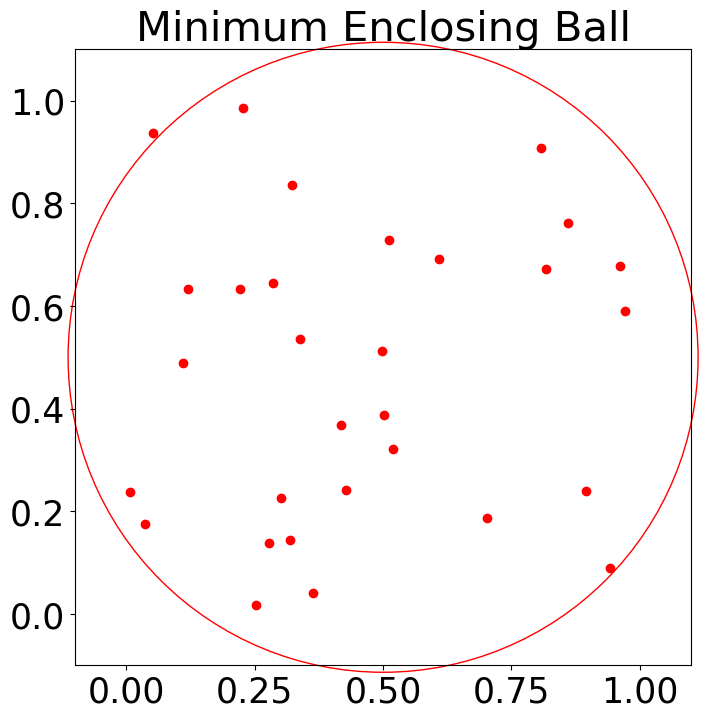

In [26]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(A[0, :], A[1, :], color='red', label='Points')
circle = plt.Circle(center, r_sol, color='r', clip_on=False, fill=False)
ax.add_patch(circle);
ax.set_xlim([-0.1, 1.1])
ax.set_ylim([-0.1, 1.1])
ax.set_aspect('equal', adjustable='box')
ax.set_title('Minimum Enclosing Ball')
plt.show()